#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [1]:
first_name= "Ahamd"
last_name= "Karami"
student_number= "401205756"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [2]:
import numpy as np
import pandas as pd


import sys
import pickle
import gzip
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [3]:
# load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# load the mnist dataset
# f = gzip.open('mnist.pkl.gz', 'rb')
# if sys.version_info < (3,):
#     data = pickle.load(f)
# else:
#     data = pickle.load(f, encoding='bytes')
# f.close()
# dataset = data
# (x_train, y_train), (x_test, y_test) = dataset

# dataset = [x_train,y_train, x_test, y_test]

# and reshape the values

x_train= np.reshape(x_train,(len(x_train) ,784))
x_test = np.reshape  (x_test,(len(x_test) ,784))
        # dataset[i] = (dataset[i] - np.min(dataset[i])) / (np.max(dataset[i])- np.min(dataset[i]))
        

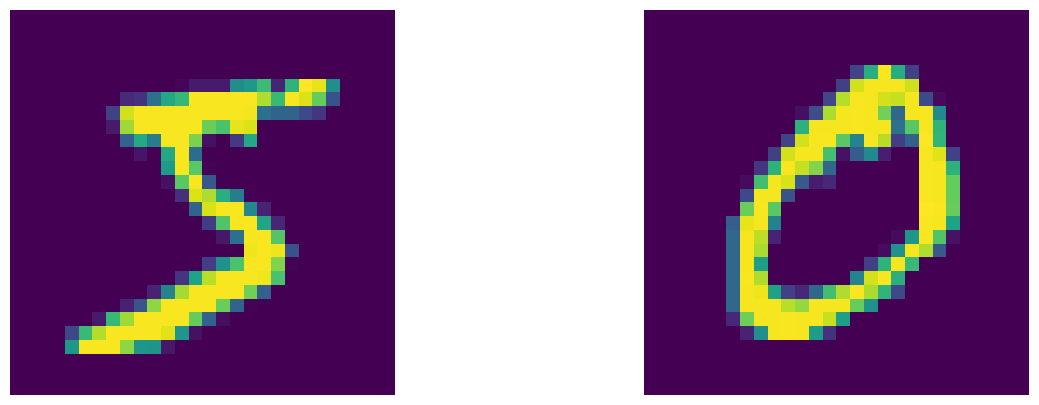

In [4]:
# here show 50 first of this images

def show_images(num_images,X):
    # TODO (implement show images function)
    #inputs dataset and number of images wants to show
    #output plot images
    _,axes = plt.subplots( 1,num_images , figsize=(15, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i].reshape(28,28))  
        ax.axis('off')

show_images(2,x_train)

# plt.imshow(x_train[0].reshape(28,28))



In [5]:
#TODO scale the data set to [0 1]
#divide data to maximum value .

x_train= x_train/ (np.max(x_train))
x_test = x_test / (np.max(x_test))
# x_train[400]

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [6]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.

# Step 2: Center the data
centered_data = x_train-np.mean(x_train)

# Calculate the covariance matrix
covariance_matrix = np.dot(centered_data.T,centered_data)/(len(x_train)-1)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
# Cov_mat = np.dot((x_train-np.mean(x_train)).T,x_train-np.mean(x_train))/(len(x_train)-1)
# eigenvalues,eigenvectors = np.linalg.eig(Cov_mat)


در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [7]:
explained_variance =0.995 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#TODO

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[sorted_indices]

total_variance= np.sum(eigenvalues)
current_variance = 0
for i in range (len(sorted_eigenvalues)):
    current_variance += sorted_eigenvalues[i]
    if current_variance / total_variance >= explained_variance:
        # this index cause variance to be greater than explained_variance
        break

selected_eigenvalues = sorted_eigenvalues[0:i]
selected_eigenvectors = sorted_eigenvectors[:,:i]


#calculate the compression_ratio
compression_ratio = len(eigenvalues)/ len(selected_eigenvalues)
print(compression_ratio)


# sorted_indices
# sorted_indices
np.shape(selected_eigenvalues)
print((i))


2.1717451523545708
361


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

(60000, 784)


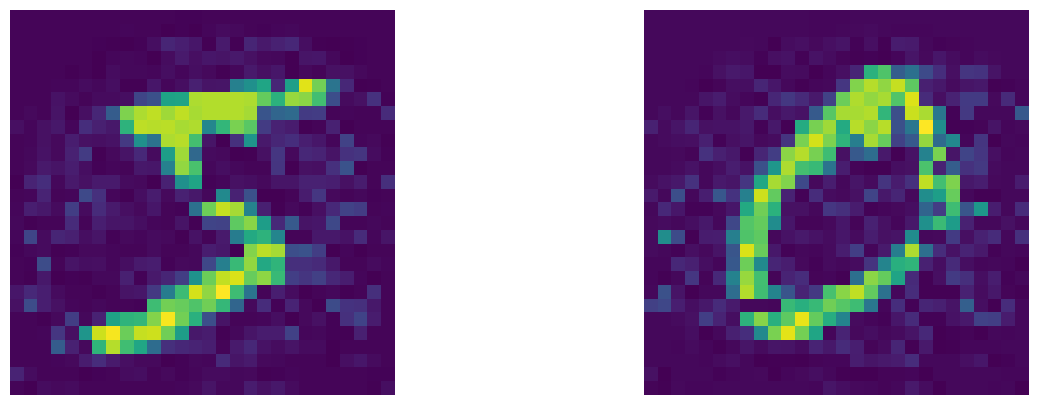

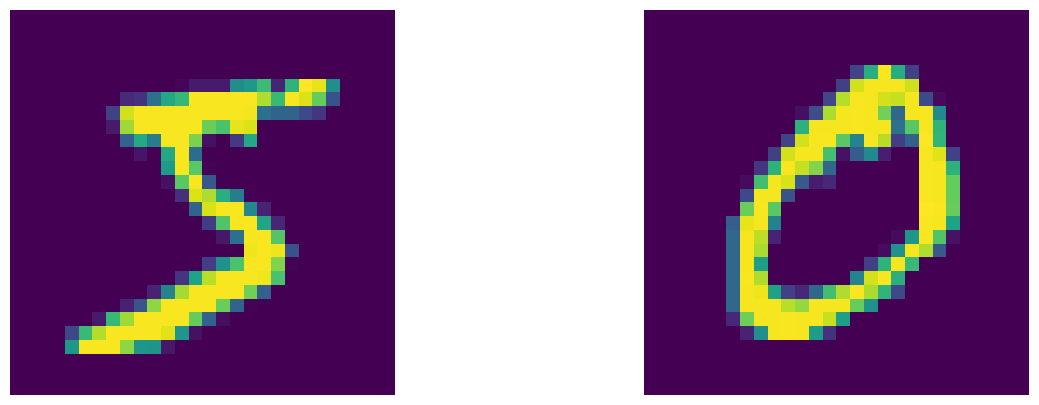

In [8]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image

#TODO

Reduced_data = np.dot(x_train,selected_eigenvectors)
Reproject_data  = np.dot(Reduced_data,selected_eigenvectors.T)
# Reproject_data = abs((Reproject_data)/ (np.max((Reproject_data))))
print(np.shape(Reproject_data))

show_images(2,abs(Reproject_data))
show_images(2,x_train)
# print(x_train[400])
# print(Reproject_data)
# print(abs(Reproject_data))
# plot the dimentionally reduced data
#plot the original data




## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [9]:
#complete below function using python PCA function
def do_pca(n_components, data):
  #input number of component and not normalized data set.
  #output is the projected dataset
  pca = PCA(n_components = n_components)
  pca_data = pca.fit_transform(data)
  R_pca_data = pca.inverse_transform(pca_data)
  projected_data  = R_pca_data.reshape((len(data), 28*28))
  return projected_data


pca_data = do_pca(100,x_train)

np.min(pca_data)



-0.5201437418085479

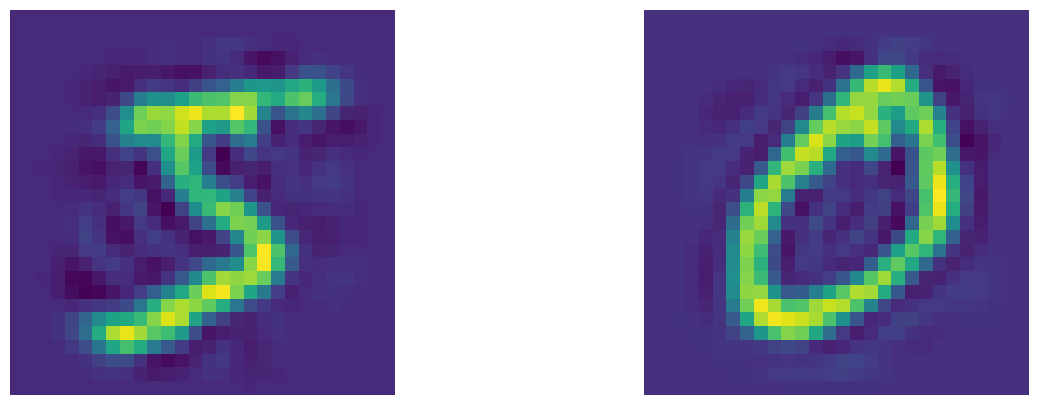

In [10]:
show_images(2,pca_data)

# show_images(5,pca_data)

# show_images(2,abs(pca_data))

In [11]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model(X, y, print_output=True):

    # from sklearn.linear_model import LogisticRegression  
    # from sklearn.metrics import accuracy_score
    y_train , y_test = y
    x_train , x_test = X

    classifier = LogisticRegression(random_state = 0)
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    # print(acc)
    # TODO
    
    return acc

# ML_model(pca_data,y_train)


In [12]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
acc_list, pc_list = [], []

for pc in range(2,102,10):
    new_dataset = do_pca(pc , x_train)
    x_testN = do_pca(pc , x_test)
    X = (new_dataset , x_testN)
    Y = (y_train , y_test)
    pc_list.append(pc)
    acc_list.append( ML_model(X, Y))
    print(pc)
    #TODO


2


c:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


12


c:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


22


c:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


32


c:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


42


c:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


52


c:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


62


c:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


72


c:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


82
92


c:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'accuracy')

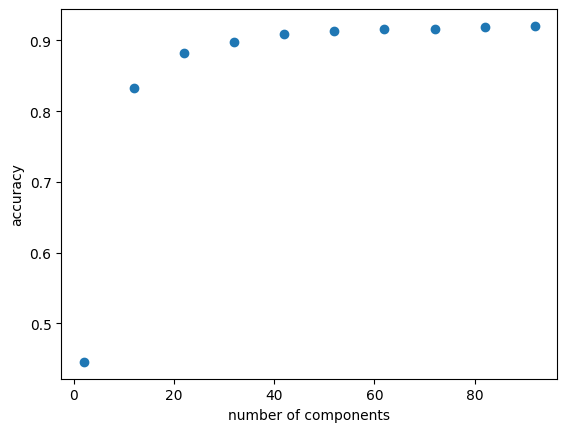

In [13]:
#plot the accuracy based on components.
plt.scatter(pc_list,acc_list)
plt.xlabel('number of components')
plt.ylabel('accuracy')
#TODO

In [14]:
X = (x_train , x_test)
Y = (y_train , y_test)
Max_acc =  ML_model( X, Y)




c:\Users\ahmad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
Max_acc

0.9258

In [17]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO
for i in range (1,len(acc_list)+1):
    if acc_list[i] == np.max(acc_list):
        break
 
print(f"the best accuracy is attained in components = {i}")
print(f"the maximum accuracy that attained is={acc_list[i]}")
print(f"the maximum accurary is={Max_acc}")

the best accuracy is attained in components = 9
the maximum accuracy that attained is=0.9206
the maximum accurary is=0.9258
